# Problem Statement:

Read the ODI stats Data and choose strike rate and average as the two factors on which you will cluster the data. Just check weather the data is clean or not and do the required imputations. Just scale the data using the scale command and create the clusters using

In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
cricket = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)

In [5]:
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [6]:
cricket.shape

(79, 13)

In [8]:
cricket.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [9]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [10]:
cricket.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

In [19]:
cric_req = cricket[['Player', 'Ave', 'SR']]
cric_req.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


In [20]:

sa_df = cric_req[['Ave', 'SR']]

# instantiate
scaler = StandardScaler()

# fit_transform
sa_df_scaled = scaler.fit_transform(sa_df)
sa_df_scaled.shape

(79, 2)

In [22]:
sa_df_scaled = pd.DataFrame(sa_df_scaled)
sa_df_scaled.columns = ['Ave', 'SR']
sa_df_scaled.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [23]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(sa_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [16]:
kmeans.labels_

array([1, 2, 2, 3, 0, 2, 2, 2, 2, 2, 3, 2, 3, 1, 0, 1, 0, 3, 2, 2, 3, 2,
       0, 2, 3, 1, 0, 3, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3, 2, 1, 1, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 3, 0])

In [24]:
cric_req['cluster_id'] = kmeans.labels_
cric_req.head()

<ipython-input-24-7b37c280899a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cric_req['cluster_id'] = kmeans.labels_


,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,2
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,3
2,RT Ponting (AUS/ICC),42.03,80.39,3
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
4,DPMD Jayawardene (Asia/SL),33.37,78.96,1


In [36]:
cric_req.head()

,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,2
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,3
2,RT Ponting (AUS/ICC),42.03,80.39,3
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
4,DPMD Jayawardene (Asia/SL),33.37,78.96,1


In [33]:
cric_req.describe()

,Ave,SR,cluster_id
count,79.000000,79.000000,79.000000
mean,38.523291,79.295316,1.645570
std,5.919093,9.925307,1.109839
min,23.570000,60.570000,0.000000
25%,34.600000,73.725000,1.000000
50%,37.870000,77.730000,1.000000
75%,41.845000,85.180000,3.000000
max,53.940000,117.000000,3.000000


## Hirarchial Clustering

In [37]:
sa_df_scaled.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [38]:
cric_req.head()

,Player,Ave,SR,cluster_id
0,SR Tendulkar (INDIA),44.83,86.23,2
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,3
2,RT Ponting (AUS/ICC),42.03,80.39,3
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
4,DPMD Jayawardene (Asia/SL),33.37,78.96,1


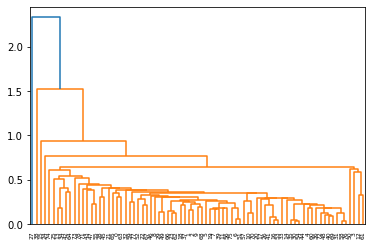

In [39]:
mergings = linkage(sa_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

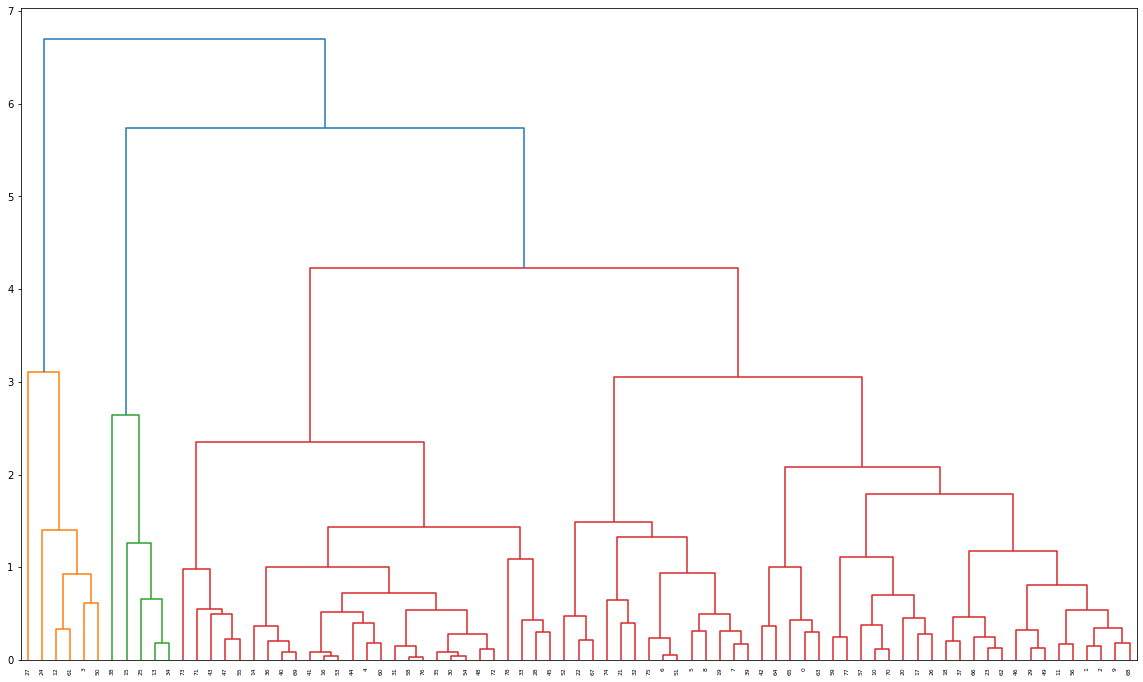

In [43]:
mergings = linkage(sa_df_scaled, method="complete", metric='euclidean')
plt.figure(figsize = [20,12])
dendrogram(mergings)
plt.xticks(rotation = 90)
plt.show()

In [44]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [47]:
# assign cluster labels
cric_req['cluster_labels'] = cluster_labels
cric_req.head()

,Player,Ave,SR,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),44.83,86.23,2,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,3,0
2,RT Ponting (AUS/ICC),42.03,80.39,3,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,0,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,1,2


In [48]:
cric_req.head(30)

,Player,Ave,SR,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),44.83,86.23,2,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,3,0
2,RT Ponting (AUS/ICC),42.03,80.39,3,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,0,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,1,2
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,3,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,3,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,3,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,3,0
9,BC Lara (ICC/WI),40.48,79.51,3,0
